In [6]:
import matplotlib.pyplot as plt
import cv2

def show(image):
    # Matplotlib kullanarak görüntü gösterme
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Koordinat eksenlerini devre dışı bırakma
    plt.show()

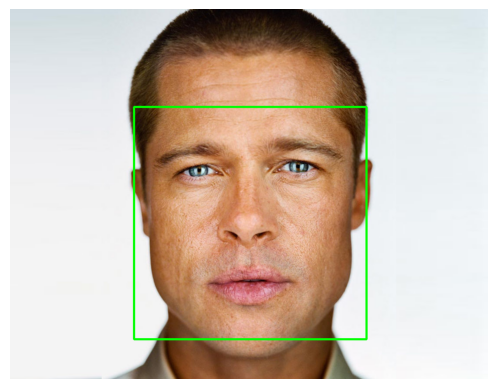

In [9]:
import cv2
import dlib


# Dedektör yükleme
detector = dlib.get_frontal_face_detector()

# Görüntüyü okuma
face_photo = cv2.imread("face.png")

# Görüntüyü gri tonlamaya çevirme
gray = cv2.cvtColor(src=face_photo, code=cv2.COLOR_BGR2GRAY)

# Dedektörü kullanarak yüz hatlarını bulma
faces = detector(gray)
for face in faces:
    x1 = face.left() # sol nokta
    y1 = face.top() # üst nokta
    x2 = face.right() # sağ nokta
    y2 = face.bottom() # alt nokta
    # Dikdörtgen çizme
    cv2.rectangle(img=face_photo, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=4)

# Görüntüyü göster
show(face_photo)


In [10]:
face_photo = cv2.imread("face.png")
print("Yüz verisi:\n")
print("Yükseklik:"+str(face_photo.shape[0]))
print("Genişlik:" + str(face_photo.shape[1]))
print("Kanal sayısı:" + str(face_photo.shape[2]))

Yüz verisi:

Yükseklik:852
Genişlik:1100
Kanal sayısı:3


In [11]:
print("Maske verisi:\n")
mask_photo = cv2.imread('mask.png')
print("Yükseklik:"+str(mask_photo.shape[0]))
print("Genişlik:" + str(mask_photo.shape[1]))
print("Kanal sayısı:" + str(mask_photo.shape[2]))

Maske verisi:

Yükseklik:604
Genişlik:604
Kanal sayısı:3


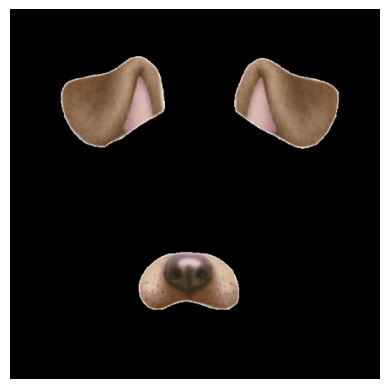

In [12]:
new_width = y2-y1
new_height = x2-x1
mask_photo = cv2.resize(mask_photo, (new_width, new_height))
show(mask_photo)

In [13]:
delta = 0.2*new_height
y1 = int(y1-delta)
y2 = int(y2-delta)
y1, y2

(118, 653)

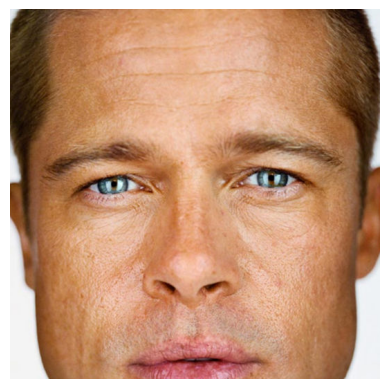

In [14]:
rows,cols,channels = mask_photo.shape
roi = face_photo[y1:y2, x1:x2 ]
show(roi)

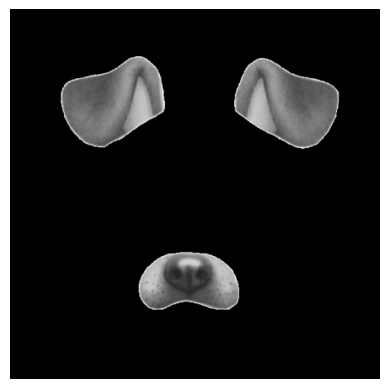

In [15]:
img2gray = cv2.cvtColor(mask_photo,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
show(img2gray)

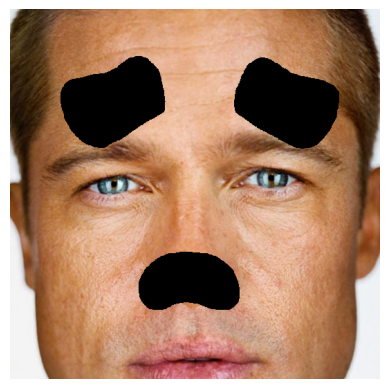

In [16]:
img1_bg = roi.copy()
img1_bg = cv2.bitwise_and(img1_bg,img1_bg,mask = mask_inv)
show(img1_bg)

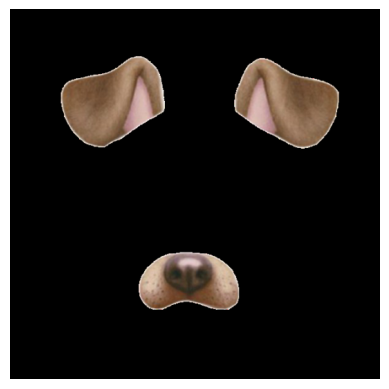

In [17]:
img2_fg = cv2.bitwise_and(mask_photo,mask_photo,mask = mask)
show(img2_fg)

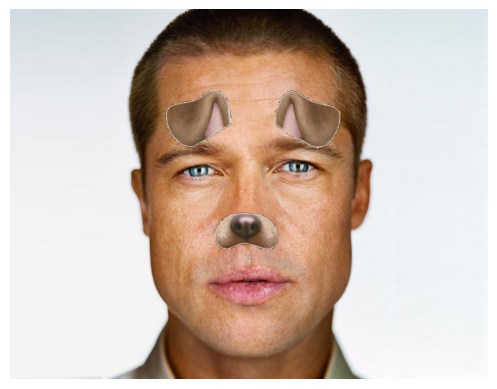

In [18]:
dst = cv2.add(img1_bg,img2_fg)
face_photo[y1:y2, x1:x2 ] = dst
show(face_photo)